In [1]:
import numpy as np
import csv
import matplotlib.pyplot as plt
from pathlib import Path
from scipy.stats import norm
from sklearn.metrics import mean_squared_error
import scipy

from scipy.optimize import curve_fit

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats
from scipy.optimize import curve_fit
import matplotlib.pylab as plt 
from pylab import exp
import numpy as np 
from scipy import optimize
from math import sqrt

In [5]:


data_folder = Path("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/L2_2/")

file_to_open = data_folder / "pixel2_2_BL0_9_TH0_96_L2_200001.csv"

f = open(file_to_open)
type(f)

csvreader= csv.reader(f)
header = []
header = next(csvreader)
header

rows = []
for row in csvreader:
        rows.append(row)
data=rows[23:]
data= np.asarray(data, dtype=float)

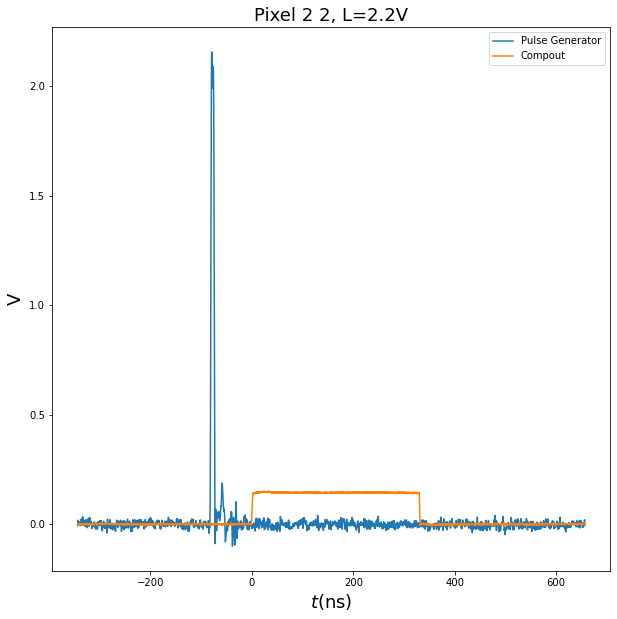

0.06249999999994316


In [7]:
time=data[:,0]
ch1= data[:,1]
ch2= data[:,2]

time = [i * 10**9 for i in time]
fig = plt.figure(figsize=(10,10))
plt.plot(time,ch1, label="Pulse Generator")
plt.plot(time,ch2,label="Compout")
plt.legend()
fig.patch.set_facecolor('xkcd:white')
plt.xlabel("$t$(ns)",fontsize=18)
plt.title("Pixel 2 2, L=2.2V",fontsize=18)
plt.ylabel("V",fontsize=18)

plt.show()


print(time[1]-time[0])


# Functions

In [3]:
def deltat(time,ch1,ch2):
    half1= max(ch1)/2
    half2= max(ch2)/2
    i=0
    while ch1[i]<half1:
        i=i+1
    j=0
    while ch2[j]<half2:
        j=j+1
    t1= time[i]
    t2= time[j]
    dt= time[j]-time[i]
    return dt, t1 ,t2

def tot(time, ch):
    half= max(ch)/2
    i=0
    while ch[i]<half:
        i=i+1
    j=i+30
    while ch[j]>half:
        j=j+1
    tott= time[j]-time[i]
    return tott

In [ ]:
%%time
det0=[]
tt10=[]
tt20=[]
t00=[]
max0=[]

data_folder = Path("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/L2_0/")


for i in range(10000):
    num= str(i+1).zfill(5)
    txt1 = "pixel_2_2_L2_0_TH0_96_BL0_90_{number}".format(number = num)
    file_to_open = data_folder / "{txt1}.csv".format(txt1=txt1)
    f = open(file_to_open)
    csvreader= csv.reader(f)
    header = []
    header = next(csvreader)
    header

    rows = []
    for row in csvreader:
            rows.append(row)
    data=rows[23:]
    data= np.asarray(data, dtype=float)

    time=data[:,0]
    ch1= data[:,1]
    ch2= data[:,2]
    max0.append(max(ch1))
    dt,t1,t2=deltat(time,ch1,ch2)
    det0.append(dt)
    tt10.append(t1)
    tt20.append(t2)
    tott= tot(time,ch2)
    t00.append(tott)

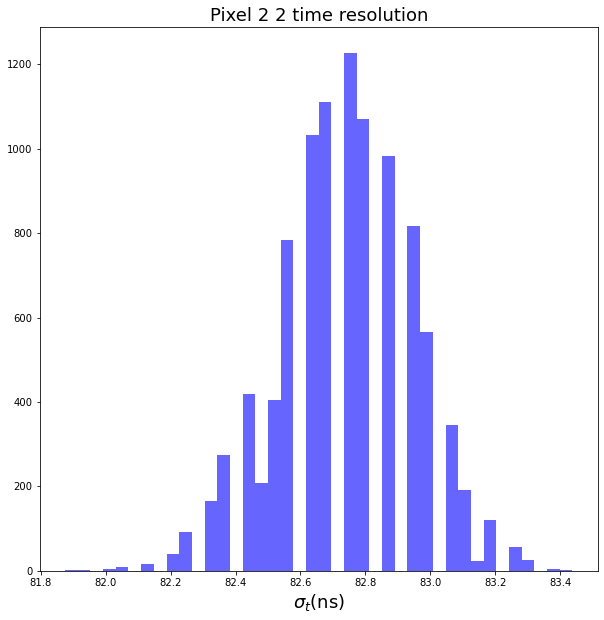

In [7]:
ns=[]
for i in range(len(det0)):
    ns.append(det0[i]*1e9)

fig = plt.figure(figsize=(10,10))
mu, std = norm.fit(ns) 
plt.hist(ns, bins=40, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.title("Pixel 2 2 time resolution",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()


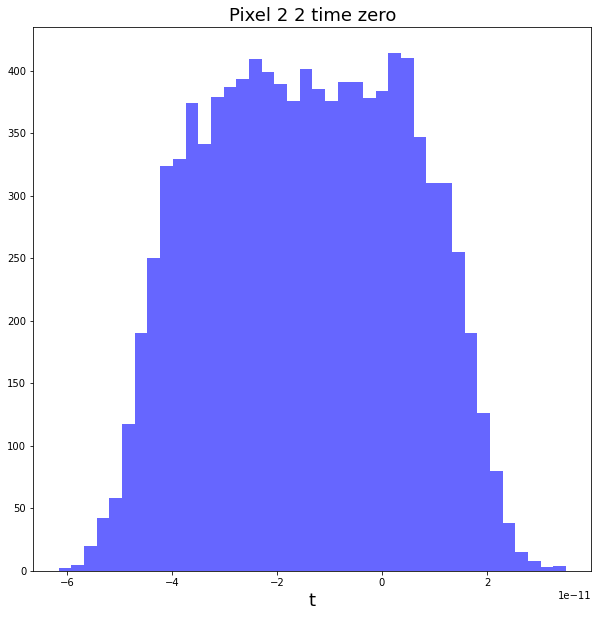

In [8]:
fig = plt.figure(figsize=(10,10))
plt.hist(tt10, bins=40, alpha=0.6, color='b')
plt.xlabel("t",fontsize=18)
plt.title("Pixel 2 2 time zero",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

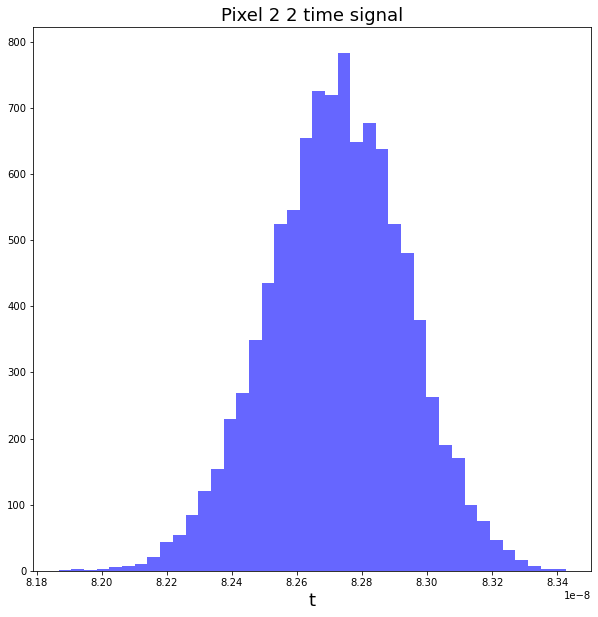

In [9]:
fig = plt.figure(figsize=(10,10))
plt.hist(tt20, bins=40, alpha=0.6, color='b')
plt.xlabel("t",fontsize=18)
plt.title("Pixel 2 2 time signal",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

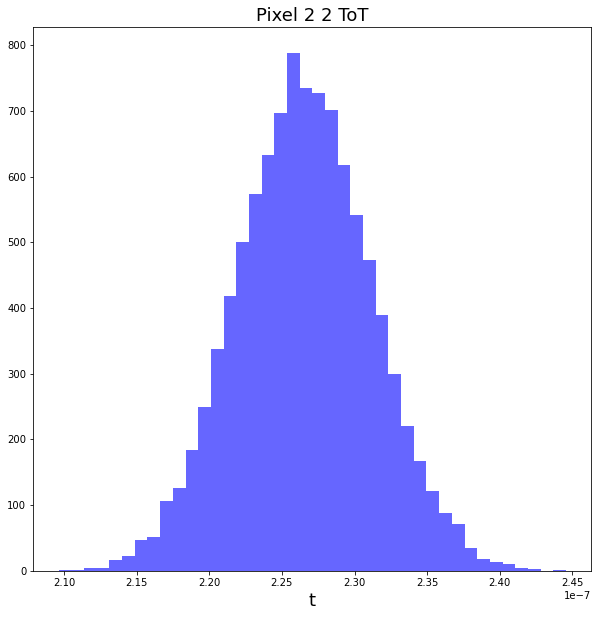

In [10]:
fig = plt.figure(figsize=(10,10))
plt.hist(t00, bins=40, alpha=0.6, color='b')
plt.xlabel("t",fontsize=18)
plt.title("Pixel 2 2 ToT",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

In [11]:
%%time
det1=[]
tt11=[]
tt21=[]
t01=[]
max1=[]

data_folder = Path("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/L2_1/")


for i in range(10000):
    num= str(i+1).zfill(5)
    txt1 = "pixel2_2_BL0_9_TH0_96_L2_1{number}".format(number = num)
    file_to_open = data_folder / "{txt1}.csv".format(txt1=txt1)
    f = open(file_to_open)
    csvreader= csv.reader(f)
    header = []
    header = next(csvreader)
    header

    rows = []
    for row in csvreader:
            rows.append(row)
    data=rows[23:]
    data= np.asarray(data, dtype=float)

    time=data[:,0]
    ch1= data[:,1]
    ch2= data[:,2]
    max1.append(max(ch1))
    dt,t1,t2=deltat(time,ch1,ch2)
    det1.append(dt)
    tt11.append(t1)
    tt21.append(t2)
    tott= tot(time,ch2)
    t01.append(tott)

CPU times: user 5min 7s, sys: 3.23 s, total: 5min 11s
Wall time: 5min 12s


In [12]:
%%time
det2=[]
tt12=[]
tt22=[]
t02=[]
max2=[]

data_folder = Path("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/L2_2/")


for i in range(10000):
    num= str(i+1).zfill(5)
    txt1 = "pixel2_2_BL0_9_TH0_96_L2_2{number}".format(number = num)
    file_to_open = data_folder / "{txt1}.csv".format(txt1=txt1)
    f = open(file_to_open)
    csvreader= csv.reader(f)
    header = []
    header = next(csvreader)
    header

    rows = []
    for row in csvreader:
            rows.append(row)
    data=rows[23:]
    data= np.asarray(data, dtype=float)

    time=data[:,0]
    ch1= data[:,1]
    ch2= data[:,2]
    max2.append(max(ch1))
    dt,t1,t2=deltat(time,ch1,ch2)
    det2.append(dt)
    tt12.append(t1)
    tt22.append(t2)
    tott= tot(time,ch2)
    t02.append(tott)

CPU times: user 5min 13s, sys: 3.12 s, total: 5min 16s
Wall time: 5min 17s


In [13]:
%%time
det3=[]
tt13=[]
tt23=[]
t03=[]
max3=[]

data_folder = Path("/home/pixel/Documents/Master_Thesis_Douwe_Nobels/Measurements/L2_3/")


for i in range(10000):
    num= str(i+1).zfill(5)
    txt1 = "pixel2_2_BL0_9_TH0_96_L2_3{number}".format(number = num)
    file_to_open = data_folder / "{txt1}.csv".format(txt1=txt1)
    f = open(file_to_open)
    csvreader= csv.reader(f)
    header = []
    header = next(csvreader)
    header

    rows = []
    for row in csvreader:
            rows.append(row)
    data=rows[23:]
    data= np.asarray(data, dtype=float)

    time=data[:,0]
    ch1= data[:,1]
    ch2= data[:,2]
    max3.append(max(ch1))
    dt,t1,t2=deltat(time,ch1,ch2)
    det3.append(dt)
    tt13.append(t1)
    tt23.append(t2)
    tott= tot(time,ch2)
    t03.append(tott)

CPU times: user 5min 15s, sys: 3.09 s, total: 5min 18s
Wall time: 5min 19s


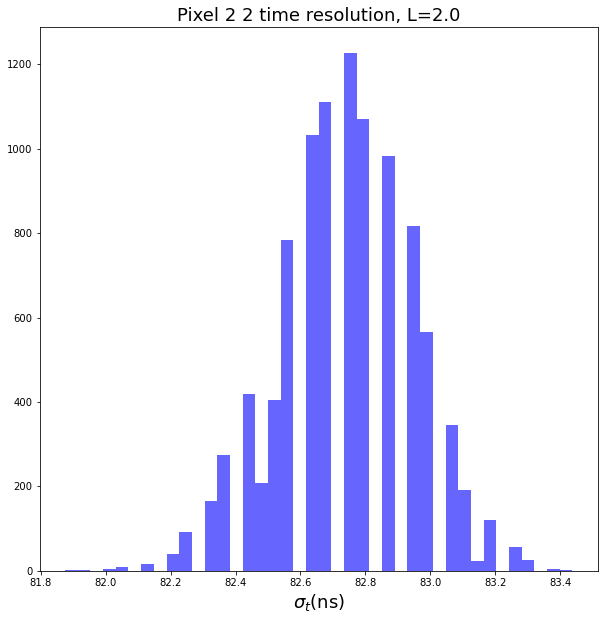

In [14]:
ns=[]
for i in range(len(det0)):
    ns.append(det0[i]*1e9)

fig = plt.figure(figsize=(10,10))
mu, std = norm.fit(ns) 
plt.hist(ns, bins=40, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.title("Pixel 2 2 time resolution, L=2.0",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()


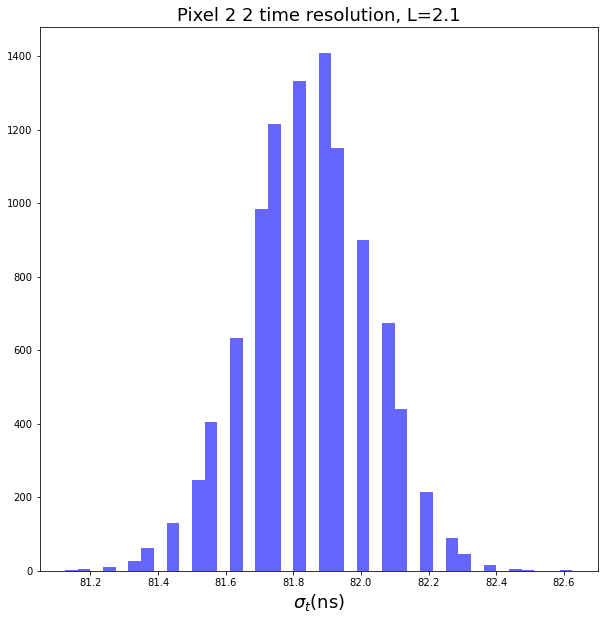

In [15]:
ns=[]
for i in range(len(det0)):
    ns.append(det1[i]*1e9)

fig = plt.figure(figsize=(10,10))
mu, std = norm.fit(ns) 
plt.hist(ns, bins=40, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.title("Pixel 2 2 time resolution, L=2.1",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

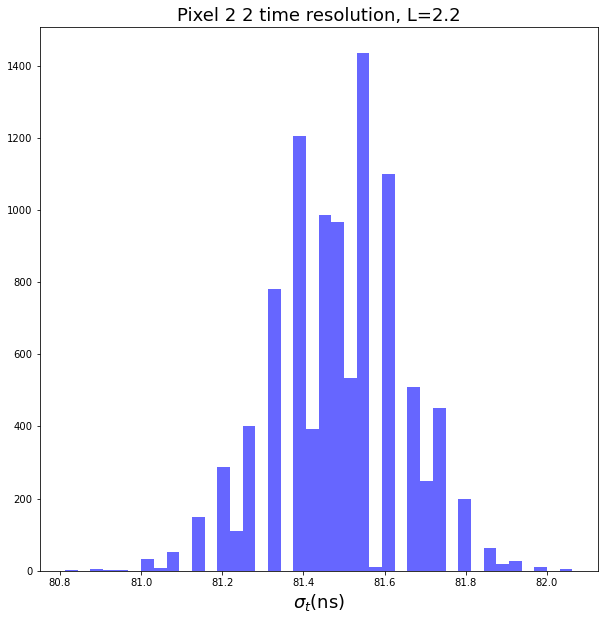

In [16]:
ns=[]
for i in range(len(det0)):
    ns.append(det2[i]*1e9)

fig = plt.figure(figsize=(10,10))
mu, std = norm.fit(ns) 
plt.hist(ns, bins=40, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.title("Pixel 2 2 time resolution, L=2.2",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

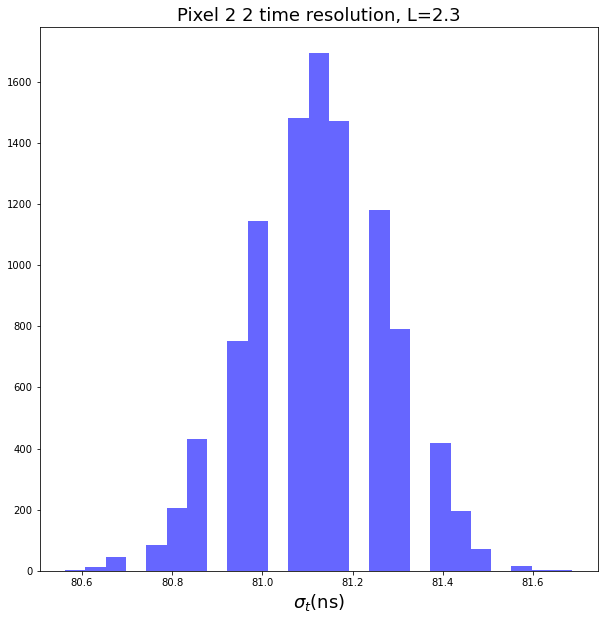

In [17]:
ns=[]
for i in range(len(det0)):
    ns.append(det3[i]*1e9)

fig = plt.figure(figsize=(10,10))
mu, std = norm.fit(ns) 
plt.hist(ns, bins=25, alpha=0.6, color='b')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
#plt.plot(x, p, 'k', linewidth=2)
plt.xlabel("$\sigma_t$(ns)",fontsize=18)
plt.title("Pixel 2 2 time resolution, L=2.3",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

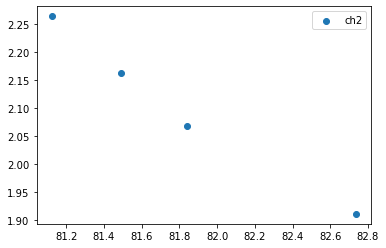

In [18]:
v=[np.mean(max0),np.mean(max1),np.mean(max2),np.mean(max3)]
sig=[np.mean(det0),np.mean(det1),np.mean(det2),np.mean(det3)]

sign = [i * 10**9 for i in sig]

plt.scatter(sign,v,label="ch2")
plt.legend()
plt.show()

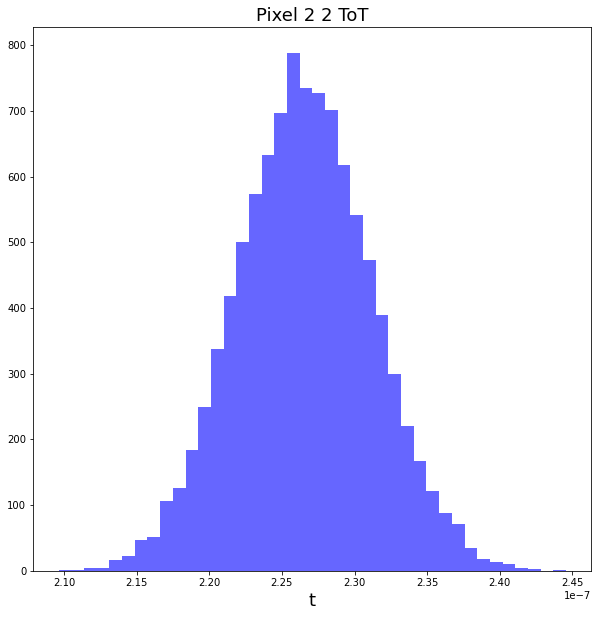

In [19]:
fig = plt.figure(figsize=(10,10))
plt.hist(t00, bins=40, alpha=0.6, color='b')
plt.xlabel("t",fontsize=18)
plt.title("Pixel 2 2 ToT",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

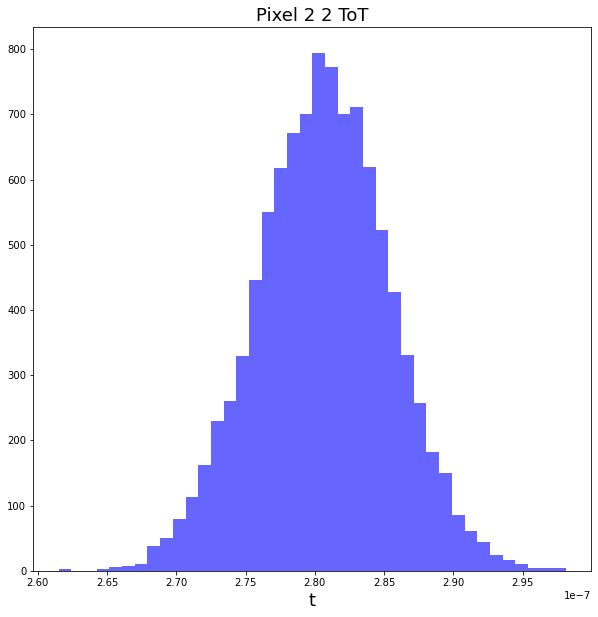

In [20]:
fig = plt.figure(figsize=(10,10))
plt.hist(t01, bins=40, alpha=0.6, color='b')
plt.xlabel("t",fontsize=18)
plt.title("Pixel 2 2 ToT",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

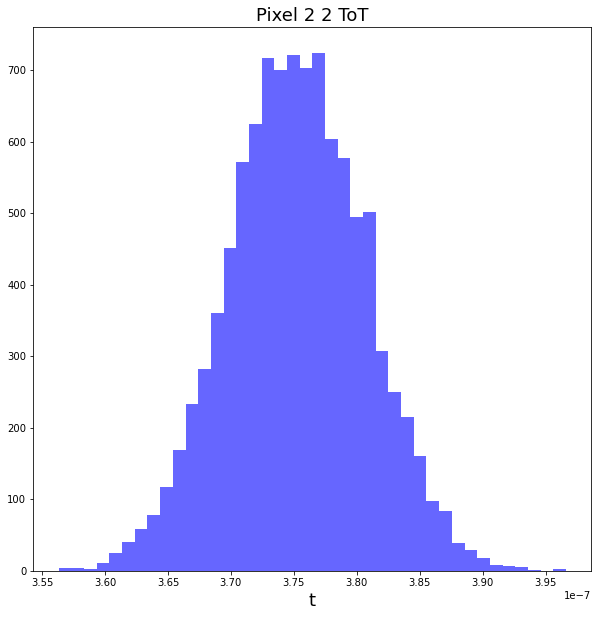

In [21]:
fig = plt.figure(figsize=(10,10))
plt.hist(t03, bins=40, alpha=0.6, color='b')
plt.xlabel("t",fontsize=18)
plt.title("Pixel 2 2 ToT",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

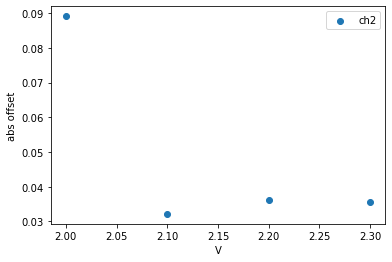

In [22]:
fillv=[2,2.1,2.2,2.3]
realv=[2-np.mean(max0),2.1-np.mean(max1),2.2-np.mean(max2),2.3-np.mean(max3)]


plt.scatter(fillv,realv,label="ch2")
plt.legend()
plt.ylabel("abs offset")
plt.xlabel("V")
plt.show()

In [23]:
t00= [i * 10**9 for i in t00]
t01= [i * 10**9 for i in t01]
t02= [i * 10**9 for i in t02]
t03= [i * 10**9 for i in t03]

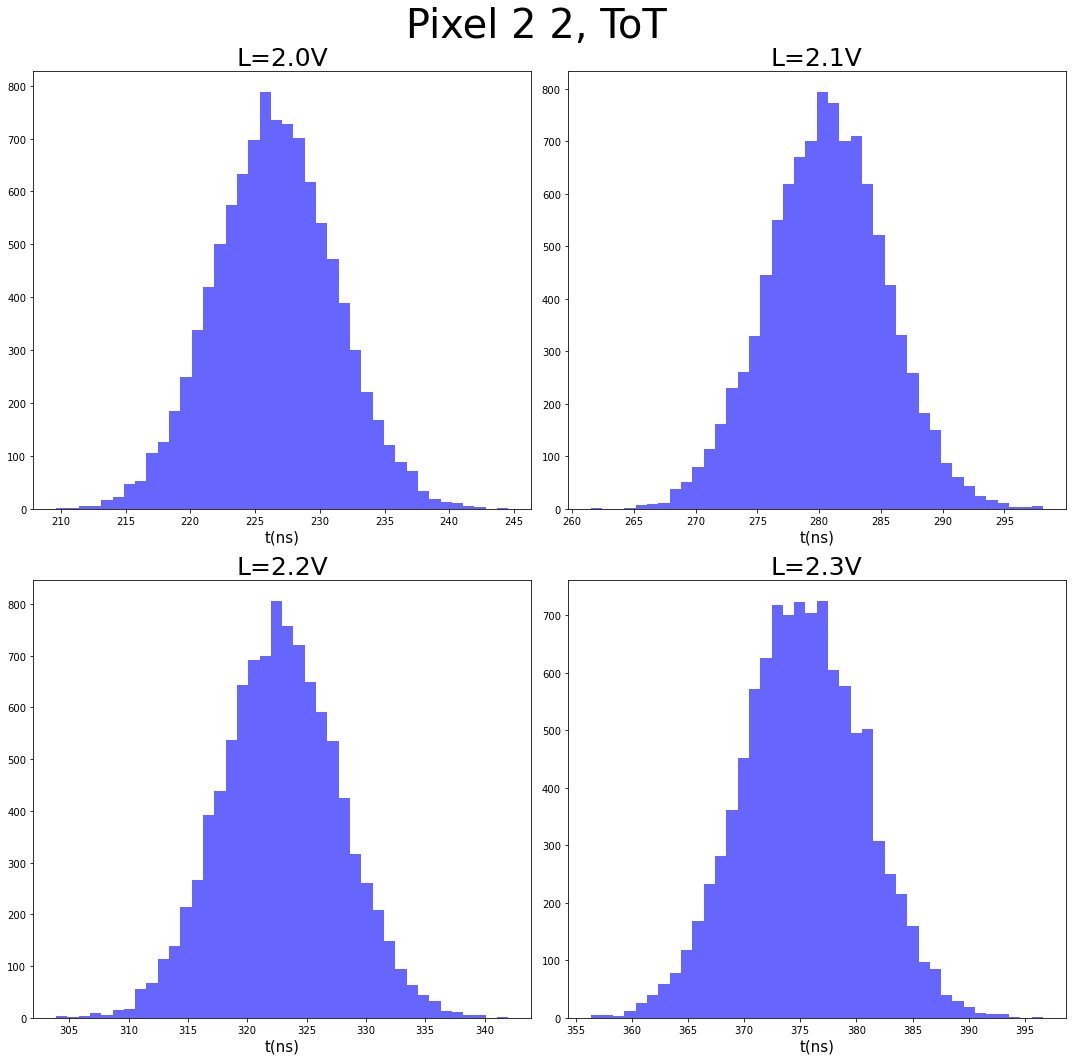

In [24]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax0.hist(t00, bins=40, alpha=0.6, color='b')
ax0.set_title('L=2.0V', fontsize=25)
ax0.set_xlabel("t(ns)",fontsize=15)

ax1.hist(t01, bins=40, alpha=0.6, color='b')
ax1.set_title('L=2.1V', fontsize=25)
ax1.set_xlabel("t(ns)",fontsize=15)


ax2.hist(t02, bins=40, alpha=0.6, color='b')
ax2.set_title('L=2.2V', fontsize=25)
ax2.set_xlabel("t(ns)",fontsize=15)

ax3.hist(t03, bins=40, alpha=0.6, color='b')
ax3.set_title('L=2.3V', fontsize=25)
ax3.set_xlabel("t(ns)",fontsize=15)


fig.suptitle("Pixel 2 2, ToT", fontsize=40)
fig.tight_layout()
plt.show()

In [25]:
det0= [i * 10**9 for i in det0]
det1= [i * 10**9 for i in det1]
det2= [i * 10**9 for i in det2]
det3= [i * 10**9 for i in det3]

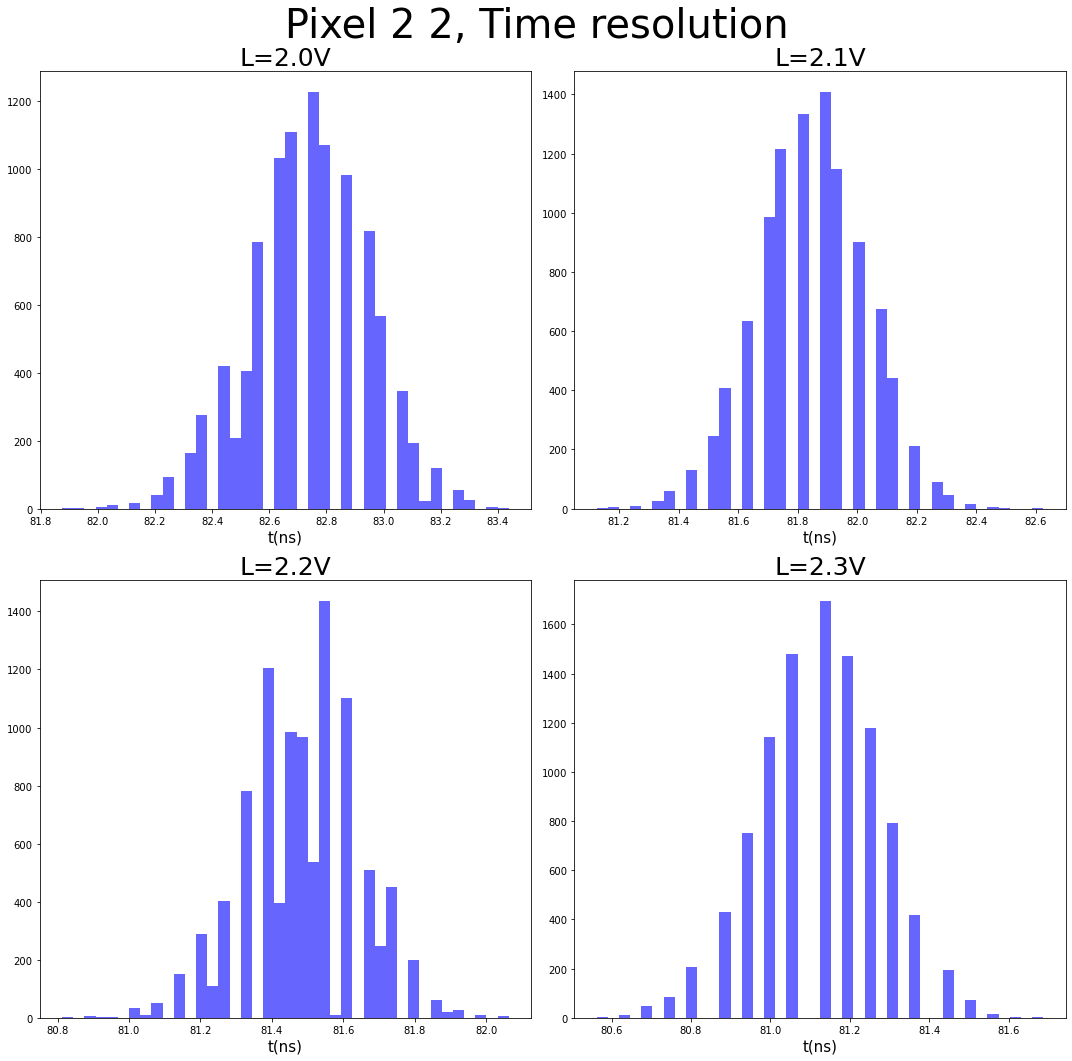

In [26]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(15)
fig.set_figwidth(15)

ax0.hist(det0, bins=40, alpha=0.6, color='b')
ax0.set_title('L=2.0V', fontsize=25)
ax0.set_xlabel("t(ns)",fontsize=15)

ax1.hist(det1, bins=40, alpha=0.6, color='b')
ax1.set_title('L=2.1V', fontsize=25)
ax1.set_xlabel("t(ns)",fontsize=15)


ax2.hist(det2, bins=40, alpha=0.6, color='b')
ax2.set_title('L=2.2V', fontsize=25)
ax2.set_xlabel("t(ns)",fontsize=15)

ax3.hist(det3, bins=40, alpha=0.6, color='b')
ax3.set_title('L=2.3V', fontsize=25)
ax3.set_xlabel("t(ns)",fontsize=15)


fig.suptitle("Pixel 2 2, Time resolution", fontsize=40)
fig.tight_layout()
plt.show()

In [27]:
len(det0)

tdet0=[]
for i in range(len(det0)):
    tdet0.append(np.mean(det0))

In [28]:
mean_squared_error(tdet0,det0,squared=False)*1000

210.63460280409134

In [29]:
np.std(det0)*1000

210.63460280409134

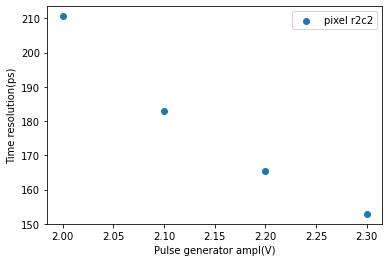

In [30]:
V=[2,2.1,2.2,2.3]
sig= [np.std(det0)*1000,np.std(det1)*1000,np.std(det2)*1000,np.std(det3)*1000]

plt.scatter(V,sig,label="pixel r2c2")
plt.legend()
plt.ylabel("Time resolution(ps)")
plt.xlabel("Pulse generator ampl(V)")
plt.show()

In [31]:
def Gaussian(x,a,b,c):
    return a * exp(-(x - b)**2.0 / (2 * c**2))

In [32]:
det00=[]
det11=[]
det22=[]
det33=[]
for i in range(len(det0)):
    det00.append(det0[i]-np.mean(det0))
    
for i in range(len(det1)):
    det11.append(det1[i]-np.mean(det1))  

for i in range(len(det2)):
    det22.append(det2[i]-np.mean(det2))

for i in range(len(det3)):
    det33.append(det3[i]-np.mean(det3))

In [62]:
TR=[]
TE=[]


 Curve-fit Curve fit: [ 1.19254409e+03 -4.26498287e-04  2.09532241e-01]

 Curve-fit Fit errors: [1.27077321e+01 2.49497273e-03 2.53730952e-03]


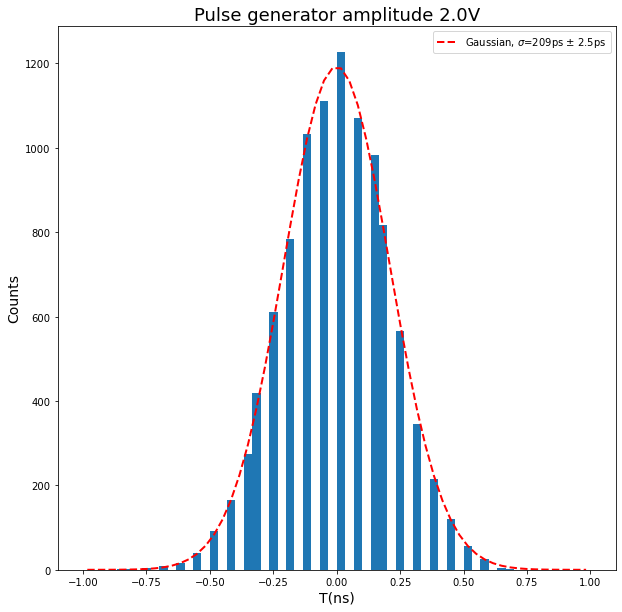

In [63]:
nbins=60
data = det00
fig = plt.figure(figsize=(10,10))

n,bins,patches = plt.hist(data,bins=nbins, range=(-1.,1.))

# Generate data from bins as a set of points 
bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
num=nbins,endpoint=True)


y = n
y[y==0]= 1e-8


newy=[]
newx=[]
for i in range(len(y)):
    if y[i]>=1:
        newy.append(y[i])
        newx.append(x[i])


popt, pcov = optimize.curve_fit(Gaussian,newx,newy) 

# Curve-fit error method
error = [] 
for i in range(len(popt)):
    try:
      error.append( np.absolute(pcov[i][i])**0.5)
    except:
      error.append( 0.00 )
pfit_curvefit = popt
perr_curvefit = np.array(error) 
print('\n Curve-fit Curve fit: %s' % pfit_curvefit)
print('\n Curve-fit Fit errors: %s' % perr_curvefit)

# Plot the fit
x_fit = np.linspace(x[0], x[-1], nbins)
y_gauss = Gaussian(x_fit, *popt)
yerr=Gaussian(x_fit,*perr_curvefit)

plt.plot(x_fit, y_gauss,linestyle='--',linewidth=2,\
color='red',label='Gaussian, $\sigma$=209ps $\pm$ 2.5ps ')
plt.title("Pulse generator amplitude 2.0V",fontsize=18)
fig.patch.set_facecolor('xkcd:white')
plt.ylabel("Counts",fontsize=14)
plt.xlabel("T(ns)",fontsize=14)

plt.legend()
plt.show()

TR.append(abs(popt[2]))
TE.append(perr_curvefit[2])



In [46]:
x[1]-x[0]

0.033333333333333326


 Curve-fit Curve fit: [ 1.35048277e+03 -1.28430102e-03  1.82848186e-01]

 Curve-fit Fit errors: [1.81832675e+01 2.96166900e-03 2.93939972e-03]


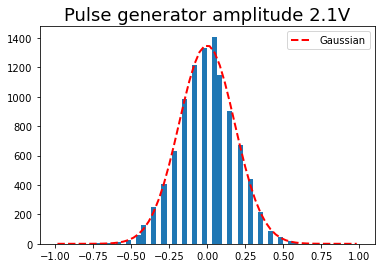

In [64]:
nbins=60
data = det11
n,bins,patches = plt.hist(data,bins=nbins, range=(-1.,1.))

# Generate data from bins as a set of points 
bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
num=nbins,endpoint=True)


y = n
y[y==0]= 1e-8

newy=[]
newx=[]
for i in range(len(y)):
    if y[i]>=1:
        newy.append(y[i])
        newx.append(x[i])


newy=[]
newx=[]
for i in range(len(y)):
    if y[i]>=1:
        newy.append(y[i])
        newx.append(x[i])


popt, pcov = optimize.curve_fit(Gaussian,newx,newy) 

# Curve-fit error method
error = [] 
for i in range(len(popt)):
    try:
      error.append( np.absolute(pcov[i][i])**0.5)
    except:
      error.append( 0.00 )
pfit_curvefit = popt
perr_curvefit = np.array(error) 
print('\n Curve-fit Curve fit: %s' % pfit_curvefit)
print('\n Curve-fit Fit errors: %s' % perr_curvefit)

# Plot the fit
x_fit = np.linspace(x[0], x[-1], nbins)
y_gauss = Gaussian(x_fit, *popt)
yerr=Gaussian(x_fit,*perr_curvefit)

plt.plot(x_fit, y_gauss,linestyle='--',linewidth=2,\
color='red',label='Gaussian')

plt.title("Pulse generator amplitude 2.1V",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.legend()
plt.show()

TR.append(abs(popt[2]))
TE.append(perr_curvefit[2])


 Curve-fit Curve fit: [1.53281803e+03 1.92551086e-03 1.63918948e-01]

 Curve-fit Fit errors: [2.64582393e+01 3.13784937e-03 3.18299051e-03]


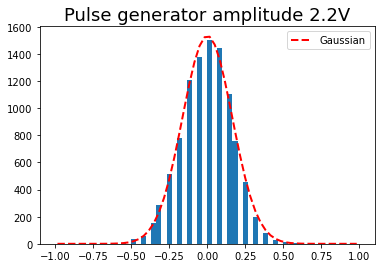

In [65]:
nbins=60
data = det22
n,bins,patches = plt.hist(data,bins=nbins, range=(-1.,1.))

# Generate data from bins as a set of points 
bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
num=nbins,endpoint=True)


y = n
y[y==0]= 1e-8

newy=[]
newx=[]
for i in range(len(y)):
    if y[i]>=1:
        newy.append(y[i])
        newx.append(x[i])


popt, pcov = optimize.curve_fit(Gaussian,newx,newy) 

# Curve-fit error method
error = [] 
for i in range(len(popt)):
    try:
      error.append( np.absolute(pcov[i][i])**0.5)
    except:
      error.append( 0.00 )
pfit_curvefit = popt
perr_curvefit = np.array(error) 
print('\n Curve-fit Curve fit: %s' % pfit_curvefit)
print('\n Curve-fit Fit errors: %s' % perr_curvefit)

# Plot the fit
x_fit = np.linspace(x[0], x[-1], nbins)
y_gauss = Gaussian(x_fit, *popt)
yerr=Gaussian(x_fit,*perr_curvefit)

plt.plot(x_fit, y_gauss,linestyle='--',linewidth=2,\
color='red',label='Gaussian')
plt.title("Pulse generator amplitude 2.2V",fontsize=18)
fig.patch.set_facecolor('xkcd:white')


plt.legend()
plt.show()

TR.append(abs(popt[2]))
TE.append(perr_curvefit[2])

In [37]:
x[1]-x[0]

0.036764705882353366


 Curve-fit Curve fit: [1.59539867e+03 2.01019785e-03 1.52444519e-01]

 Curve-fit Fit errors: [1.91109506e+01 2.27402380e-03 2.22877063e-03]


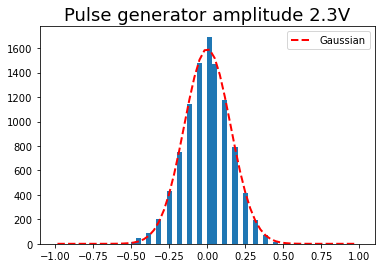

In [73]:
nbins=60
data = det33
n,bins,patches = plt.hist(data,bins=nbins, range=(-1.,1.))

# Generate data from bins as a set of points 
bin_size = abs(bins[1]-bins[0])
x =np.linspace(start=bins[0]+bin_size/2.0,stop=bins[-2]+bin_size/2.0,\
num=nbins,endpoint=True)


y = n
y[y==0]= 1e-8

newy=[]
newx=[]
for i in range(len(y)):
    if y[i]>=1:
        newy.append(y[i])
        newx.append(x[i])


popt, pcov = optimize.curve_fit(Gaussian,newx,newy) 

# Curve-fit error method
error = [] 
for i in range(len(popt)):
    try:
      error.append( np.absolute(pcov[i][i])**0.5)
    except:
      error.append( 0.00 )
pfit_curvefit = popt
perr_curvefit = np.array(error) 
print('\n Curve-fit Curve fit: %s' % pfit_curvefit)
print('\n Curve-fit Fit errors: %s' % perr_curvefit)

# Plot the fit
x_fit = np.linspace(x[0], x[-1], nbins)
y_gauss = Gaussian(x_fit, *popt)
yerr=Gaussian(x_fit,*perr_curvefit)

plt.plot(x_fit, y_gauss,linestyle='--',linewidth=2,\
color='red',label='Gaussian')

plt.title("Pulse generator amplitude 2.3V",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.legend()
plt.show()

TR.append(abs(popt[2]))
TE.append(perr_curvefit[2])



In [39]:
x[2]-x[1]

0.03308823529411764

In [40]:
newy=[]
newx=[]
for i in range(len(y)):
    if y[i]>=1:
        newy.append(y[i])
        newx.append(x[i])


ValueError: 'x' and 'y' must have the same size

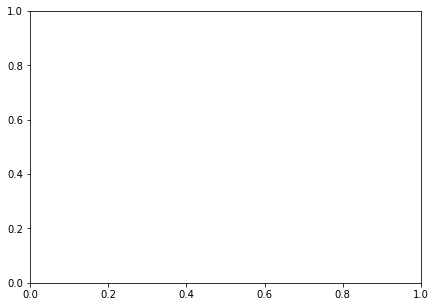

In [75]:
V=[2,2.1,2.2,2.3]
fig = plt.figure(figsize=(7,5))
plt.errorbar(V,TR, yerr=TE, fmt="o", label="pixel r2c2")
plt.xlabel("Pulse generator ampl(V)",fontsize=18)
plt.ylabel("Time resolution(ns)",fontsize=18)

plt.title("Time Resolution vs laser pulse generator amplitude",fontsize=18)
plt.legend()
fig.patch.set_facecolor('xkcd:white')


plt.show()

# 

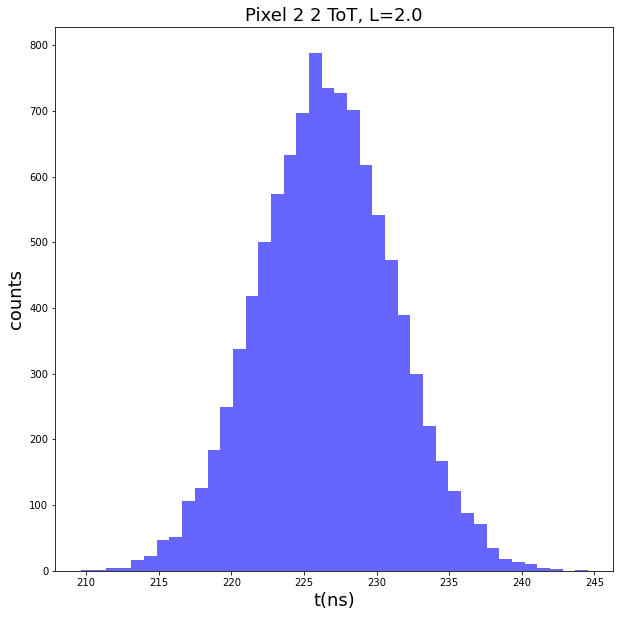

In [74]:
fig = plt.figure(figsize=(10,10))
plt.hist(t00, bins=40, alpha=0.6, color='b')
plt.xlabel("t(ns)",fontsize=18)
plt.ylabel("counts", fontsize=18)
plt.title("Pixel 2 2 ToT, L=2.0",fontsize=18)
fig.patch.set_facecolor('xkcd:white')

plt.show()

In [79]:
tott= [np.mean(t00),np.mean(t01),np.mean(t02),np.mean(t03)]
totte=[np.std(t00),np.std(t01),np.std(t02),np.std(t03)]

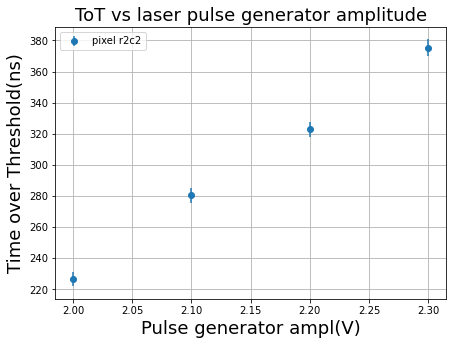

In [82]:
V=[2,2.1,2.2,2.3]
fig = plt.figure(figsize=(7,5))
plt.errorbar(V,tott, yerr=totte, fmt="o", label="pixel r2c2")
plt.xlabel("Pulse generator ampl(V)",fontsize=18)
plt.ylabel("Time over Threshold(ns)",fontsize=18)

plt.title("ToT vs laser pulse generator amplitude",fontsize=18)
plt.legend()
plt.grid()
fig.patch.set_facecolor('xkcd:white')


plt.show()